# Reinforcement Learning Practice: Grid World

***Charles Zhang***

***Jun 14***

![](steps.png)

In [1]:
import numpy as np

In [2]:
BOARD_ROWS = 5
BOARD_COLS = 5
START = (0, 0)
END = (4, 4)

### Environment Setting

In [3]:
class State:

    def __init__(self, state=START):
        self.board = np.zeros([BOARD_ROWS, BOARD_COLS])
        self.state = state    # tuple of the coordinate
        self.is_end = False

    def give_reward(self):
        if self.state == END:
            return 1
        else:
            return 0

    def check_end(self):
        if self.state == END:
            self.is_end = True

    def next_position(self, action):
        if action == "up":
            next_state = (self.state[0] - 1, self.state[1])
        elif action == "down":
            next_state = (self.state[0] + 1, self.state[1])
        elif action == "left":
            next_state = (self.state[0], self.state[1] - 1)
        else:
            next_state = (self.state[0], self.state[1] + 1)
        if (next_state[0] >= 0) and (next_state[0] < BOARD_ROWS):
            if (next_state[1] >= 0) and (next_state[1] < BOARD_COLS):
                return next_state
        return self.state

    def show_board(self):
        self.board[self.state] = 1
        for i in range(0, BOARD_ROWS):
            print('----------------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                if self.board[i, j] == 1:
                    token = '*'
                if self.board[i, j] == -1:
                    token = 'z'
                if self.board[i, j] == 0:
                    token = '0'
                out += token + ' | '
            print(out)
        print('----------------------')

In [4]:
start = State()
print(start.state)
start.show_board()

(0, 0)
----------------------
| * | 0 | 0 | 0 | 0 | 
----------------------
| 0 | 0 | 0 | 0 | 0 | 
----------------------
| 0 | 0 | 0 | 0 | 0 | 
----------------------
| 0 | 0 | 0 | 0 | 0 | 
----------------------
| 0 | 0 | 0 | 0 | 0 | 
----------------------


In [5]:
end = State(state=END)
print(end.state)
end.show_board()

(4, 4)
----------------------
| 0 | 0 | 0 | 0 | 0 | 
----------------------
| 0 | 0 | 0 | 0 | 0 | 
----------------------
| 0 | 0 | 0 | 0 | 0 | 
----------------------
| 0 | 0 | 0 | 0 | 0 | 
----------------------
| 0 | 0 | 0 | 0 | * | 
----------------------


### Agent Setting

In [6]:
class Agent:

    def __init__(self, learning="sv"):
        """
        :param: learning="q" for Q-learning, "sv" for learning based on the state values
        """
        self.learning = learning  
        self.actions = ["up", "down", "left", "right"]      # space
        self.State = State()
        self.is_end = self.State.is_end
        self.alpha = 0.3
        self.exp_rate = 1
        self.decay_gamma = 0.9
        self.state_values = {}         # init state values
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                self.state_values[(i, j)] = 0
        self.state_values[END] = 1
        self.Q_values = {}             # init Q values (dict)
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                self.Q_values[(i, j)] = {}
                for a in self.actions:
                    self.Q_values[(i, j)][a] = 0
        self.steps = []
        
    def optimal_action(self):
        max_value = 0
        action = ""
        for a in self.actions:
            if self.learning == "q":
                next_value = self.Q_values[self.State.state][a]
            else:
                next_value = self.state_values[self.State.next_position(a)]
            if next_value >= max_value:
                action = a
                max_value = next_value
        return action
    
    def get_action(self):
        max_value = 0
        action = ""
        if np.random.uniform(0, 1) <= self.exp_rate:
            action = np.random.choice(self.actions)
        else:
            action = self.optimal_action()
        return action

    def set_action(self, action):
        curr_state = self.State.state  
        next_state = self.State.next_position(action)  
        self.State = State(state=next_state) 
        qs_of_next_state = []
        for q_value in self.Q_values[next_state]:  
            qs_of_next_state.append(self.Q_values[next_state][q_value])
        delta = self.alpha*(self.State.give_reward() +
                            self.decay_gamma*(max(qs_of_next_state)) -
                            self.Q_values[curr_state][action])
        self.Q_values[curr_state][action] = round(self.Q_values[curr_state][action]+delta,2)

        self.state_values[curr_state] += self.alpha*(self.state_values[next_state] -
                                                self.state_values[curr_state])
        self.state_values[curr_state] = round(self.state_values[curr_state], 3)
                

    def show_state_values(self):
        for i in range(0, BOARD_ROWS):
            print('----------------------------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                out += str(self.state_values[(i, j)]) + ' | '
            print(out)
        print('----------------------------------')

    def reset(self):
        self.State = State()
        self.is_end = self.State.is_end

    def train(self, rounds=100):
        print("Training...")
        for r in range(rounds): 
            self.exp_rate *= 0.9
            self.reset()
            step = 0
            while not self.is_end:
                action = self.get_action()
                self.set_action(action)
                self.State.check_end()
                self.is_end = self.State.is_end
                step += 1
            self.steps.append(step)
        print("Training finished!")
                    

### Training

In [7]:
agent = Agent(learning="q")
agent.train()

Training...
Training finished!


### Plot

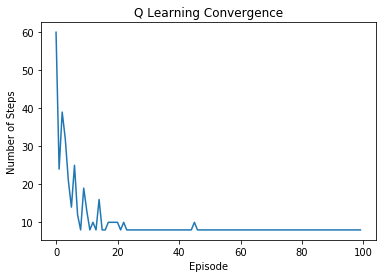

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
x = []
for i in range(100):
    x.append(i)
y = agent.steps
plt.plot(x,y)
plt.ylabel('Number of Steps')
plt.xlabel('Episode')
plt.title('Q Learning Convergence')
plt.show()

Training...
Training finished!


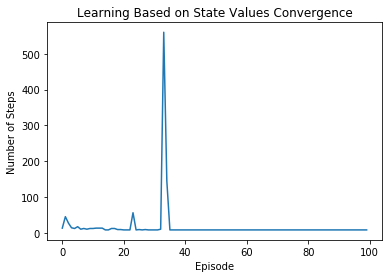

In [9]:
agent2 = Agent(learning="sv")
agent2.train()
x = []
for i in range(100):
    x.append(i)
y = agent2.steps
plt.plot(x,y)
plt.ylabel('Number of Steps')
plt.xlabel('Episode')
plt.title('Learning Based on State Values Convergence')
plt.show()

### Observation

Using decaying $\epsilon$ greedy policy shown below,

$$\pi(s)=\left\{\begin{array}{ll} a \in A, & \mathbb{P} = \epsilon \\ a \in \arg \max _{a\prime} Q_{k}\left(s_{k}, a\prime\right), & \mathbb{P} = 1-\epsilon \end{array}\right.$$

where $\epsilon$ decreases over time proportionally. 

Then I got the picture above showing steps converge over time. 

However, as there are lots of equivalent movements getting to the end, the performance of the reinforcement learning based on the state values is much more unstable than Q learning's. 

***References:***

https://towardsdatascience.com/reinforcement-learning-demystified-exploration-vs-exploitation-in-multi-armed-bandit-setting-be950d2ee9f6

https://arxiv.org/pdf/1801.05086.pdf

https://github.com/zcczhang/UAV_Coverage/blob/master/Daily_Codes/Grid%20World/Grid_World_v2.ipynb